# Non-Linear Relationships

## Decision Trees

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import sys
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [4]:
bd = pd.read_csv('Boston.csv')
bd = bd.loc[:, ~bd.columns.str.contains('^Unnamed')]
y = bd['medv'].values
bd = bd.drop('medv', axis=1)
X = bd[['lstat']].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X_train,y_train)

y_train_predict = tree.predict(X_train)
y_test_predict = tree.predict(X_test)

print(r2_score(y_train,y_train_predict))
print(r2_score(y_test,y_test_predict))

0.7258749329661913
0.592810100130491


## Random Forest 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [72]:
X = bd.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
forest = RandomForestRegressor(n_estimators = 500, criterion = 'friedman_mse')
forest.fit(X_train,y_train)
y_train_predict = forest.predict(X_train)
y_test_predict = forest.predict(X_test)
print(r2_score(y_train,y_train_predict))
print(r2_score(y_test,y_test_predict))

0.9787304240496506
0.873609179623281


## Feature Importances

<AxesSubplot: >

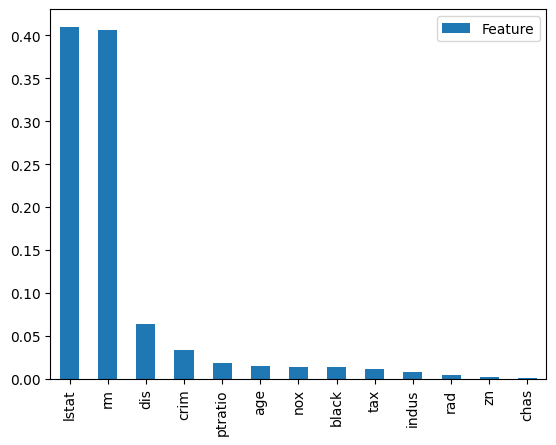

In [73]:
forest.feature_importances_
result = pd.DataFrame(forest.feature_importances_,bd.columns)
result.columns = ['Feature']
result.sort_values(by="Feature", ascending = False).plot(kind="bar")
